In [2]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mp

mkdir -p failed for path C:\Users\saahi\.matplotlib: [WinError 5] Access is denied: 'C:\\Users\\saahi\\.matplotlib'
Matplotlib created a temporary cache directory at C:\Users\saahi\AppData\Local\Temp\matplotlib-ffvk1l4w because there was an issue with the default path (C:\Users\saahi\.matplotlib); it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [3]:
trnx=pd.read_csv('Retail_Data_Transactions.csv')
trnx

,customer_id,trans_date,tran_amount
0,CS5295,11-Feb-13,35
1,CS4768,15-Mar-15,39
2,CS2122,26-Feb-13,52
3,CS1217,16-Nov-11,99
4,CS1850,20-Nov-13,78
...,...,...,...
124995,CS8433,26-Jun-11,64
124996,CS7232,19-Aug-14,38
124997,CS8731,28-Nov-14,42
124998,CS8133,14-Dec-13,13


In [4]:
response=pd.read_csv('Retail_Data_Response.csv')
response

,customer_id,response
0,CS1112,0
1,CS1113,0
2,CS1114,1
3,CS1115,1
4,CS1116,1
...,...,...
6879,CS8996,0
6880,CS8997,0
6881,CS8998,0
6882,CS8999,0


In [5]:
#merging both the tables(trnx and response)
df=trnx.merge(response, on='customer_id', how='left')
#we have used left join 
df

,customer_id,trans_date,tran_amount,response
0,CS5295,11-Feb-13,35,1.0
1,CS4768,15-Mar-15,39,1.0
2,CS2122,26-Feb-13,52,0.0
3,CS1217,16-Nov-11,99,0.0
4,CS1850,20-Nov-13,78,0.0
...,...,...,...,...
124995,CS8433,26-Jun-11,64,0.0
124996,CS7232,19-Aug-14,38,0.0
124997,CS8731,28-Nov-14,42,0.0
124998,CS8133,14-Dec-13,13,0.0


In [6]:
#features
df.dtypes

customer_id     object
trans_date      object
tran_amount      int64
response       float64
dtype: object

In [7]:
df.shape

(125000, 4)

In [8]:
df.describe() #checking statistcal data, checks for only numbers datatype(int and float)

,tran_amount,response
count,125000.000000,124969.000000
mean,64.991912,0.110763
std,22.860006,0.313840
min,10.000000,0.000000
25%,47.000000,0.000000
50%,65.000000,0.000000
75%,83.000000,0.000000
max,105.000000,1.000000


In [9]:
#missing values
df.isnull().sum()

customer_id     0
trans_date      0
tran_amount     0
response       31
dtype: int64

In [10]:
df=df.dropna()
df

,customer_id,trans_date,tran_amount,response
0,CS5295,11-Feb-13,35,1.0
1,CS4768,15-Mar-15,39,1.0
2,CS2122,26-Feb-13,52,0.0
3,CS1217,16-Nov-11,99,0.0
4,CS1850,20-Nov-13,78,0.0
...,...,...,...,...
124995,CS8433,26-Jun-11,64,0.0
124996,CS7232,19-Aug-14,38,0.0
124997,CS8731,28-Nov-14,42,0.0
124998,CS8133,14-Dec-13,13,0.0


In [11]:
#changing datatypes
df['trans_date']=pd.to_datetime(df['trans_date'])
df

C:\Users\saahi\AppData\Local\Temp\ipykernel_24948\3148544311.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['trans_date']=pd.to_datetime(df['trans_date'])
C:\Users\saahi\AppData\Local\Temp\ipykernel_24948\3148544311.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['trans_date']=pd.to_datetime(df['trans_date'])


,customer_id,trans_date,tran_amount,response
0,CS5295,2013-02-11,35,1.0
1,CS4768,2015-03-15,39,1.0
2,CS2122,2013-02-26,52,0.0
3,CS1217,2011-11-16,99,0.0
4,CS1850,2013-11-20,78,0.0
...,...,...,...,...
124995,CS8433,2011-06-26,64,0.0
124996,CS7232,2014-08-19,38,0.0
124997,CS8731,2014-11-28,42,0.0
124998,CS8133,2013-12-14,13,0.0


In [12]:
set(df['response'])

{0.0, 1.0}

In [13]:
df['response']=df['response'].astype('int64')
df

C:\Users\saahi\AppData\Local\Temp\ipykernel_24948\3883176839.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['response']=df['response'].astype('int64')


,customer_id,trans_date,tran_amount,response
0,CS5295,2013-02-11,35,1
1,CS4768,2015-03-15,39,1
2,CS2122,2013-02-26,52,0
3,CS1217,2011-11-16,99,0
4,CS1850,2013-11-20,78,0
...,...,...,...,...
124995,CS8433,2011-06-26,64,0
124996,CS7232,2014-08-19,38,0
124997,CS8731,2014-11-28,42,0
124998,CS8133,2013-12-14,13,0


In [15]:
#check for outliers
#Z-score
'''
from scipy import stats

#calc z-score
z_score=np.abs(stats.zscore(df['tran_amount']))

#set threshold
threshold=3    #anything greater than +3 or lesser than -3 is an outlier

outliers=z_score>threshold #here its only greater than +3 because we have used abs

print(a[outliers])'''

"\nfrom scipy import stats\n\n#calc z-score\nz_score=np.abs(stats.zscore(df['tran_amount']))\n\n#set threshold\nthreshold=3    #anything greater than +3 or lesser than -3 is an outlier\n\noutliers=z_score>threshold #here its only greater than +3 because we have used abs\n\nprint(a[outliers])"

In [16]:
import matplotlib.pyplot as plt

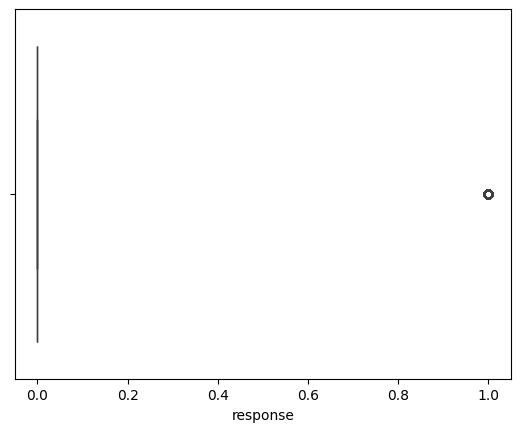

In [17]:
sns.boxplot(x=df['response'])
plt.show()

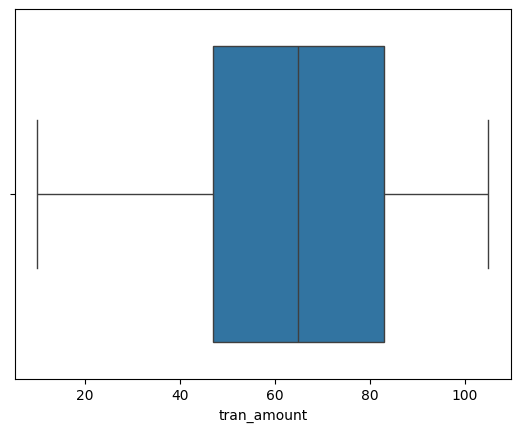

In [18]:
sns.boxplot(x=df['tran_amount'])
plt.show()

In [19]:
#creating new columns
df['month']=df['trans_date'].dt.month
df

C:\Users\saahi\AppData\Local\Temp\ipykernel_24948\2478434404.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month']=df['trans_date'].dt.month


,customer_id,trans_date,tran_amount,response,month
0,CS5295,2013-02-11,35,1,2
1,CS4768,2015-03-15,39,1,3
2,CS2122,2013-02-26,52,0,2
3,CS1217,2011-11-16,99,0,11
4,CS1850,2013-11-20,78,0,11
...,...,...,...,...,...
124995,CS8433,2011-06-26,64,0,6
124996,CS7232,2014-08-19,38,0,8
124997,CS8731,2014-11-28,42,0,11
124998,CS8133,2013-12-14,13,0,12


In [20]:
df['year']=df['trans_date'].dt.year
df

C:\Users\saahi\AppData\Local\Temp\ipykernel_24948\4029333850.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year']=df['trans_date'].dt.year


,customer_id,trans_date,tran_amount,response,month,year
0,CS5295,2013-02-11,35,1,2,2013
1,CS4768,2015-03-15,39,1,3,2015
2,CS2122,2013-02-26,52,0,2,2013
3,CS1217,2011-11-16,99,0,11,2011
4,CS1850,2013-11-20,78,0,11,2013
...,...,...,...,...,...,...
124995,CS8433,2011-06-26,64,0,6,2011
124996,CS7232,2014-08-19,38,0,8,2014
124997,CS8731,2014-11-28,42,0,11,2014
124998,CS8133,2013-12-14,13,0,12,2013


In [21]:
#checking which 3 months have the hightest transaction amount
monthly_sales=df.groupby('month')['tran_amount'].sum()
monthly_sales=monthly_sales.sort_values(ascending=False).reset_index().head(3)
monthly_sales

,month,tran_amount
0,8,726775
1,10,725058
2,1,724089


In [22]:
#checking which 4 years have the hightest transaction amount
yearly_sales=df.groupby('year')['tran_amount'].sum()
yearly_sales=yearly_sales.sort_values(ascending=False).reset_index().head(4)
yearly_sales

,year,tran_amount
0,2013,2137140
1,2012,2115542
2,2014,2094508
3,2011,1340013


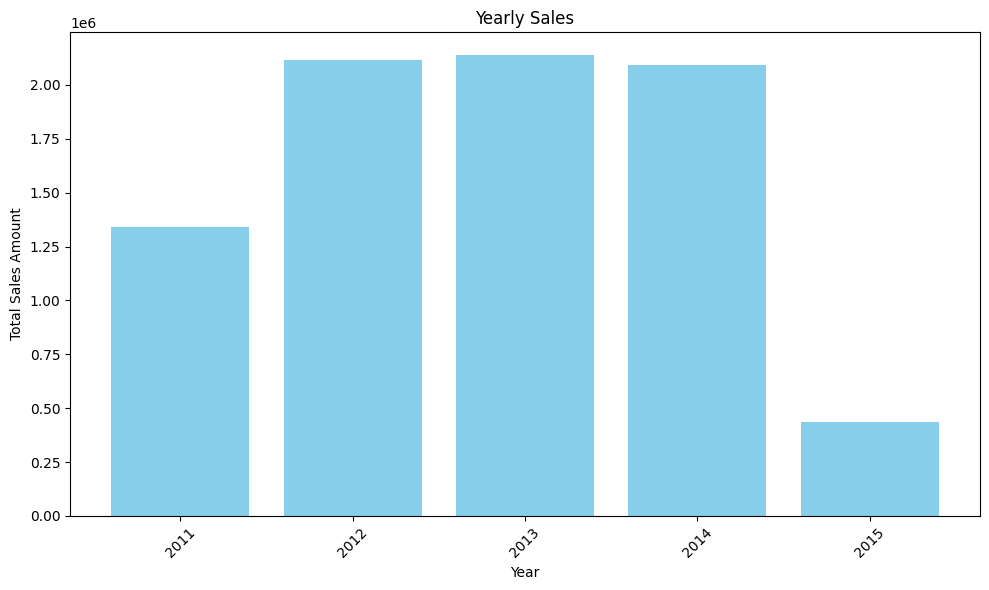

In [23]:
#ploting graph for all the years

ayearly_sales=df.groupby('year')['tran_amount'].sum()
ayearly_sales=ayearly_sales.sort_values(ascending=False).reset_index()
ayearly_sales

# Extracting data for plotting
years = ayearly_sales['year']
sales = ayearly_sales['tran_amount']

# Plotting the bar graph
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(years, sales, color='skyblue')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Total Sales Amount')
plt.title('Yearly Sales')

# Rotating x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

In [24]:
ayearly_sales

,year,tran_amount
0,2013,2137140
1,2012,2115542
2,2014,2094508
3,2011,1340013
4,2015,435175


In [25]:
#customers having highest num of orders
customer_counts=df['customer_id'].value_counts().reset_index()
customer_counts.columns=['customer_id','count']

#sort
top_5_cus=customer_counts.sort_values(by='count',ascending=False).head(5)
top_5_cus

,customer_id,count
0,CS4424,39
1,CS4320,38
2,CS3799,36
3,CS3805,35
4,CS1215,35


<Axes: xlabel='customer_id', ylabel='count'>

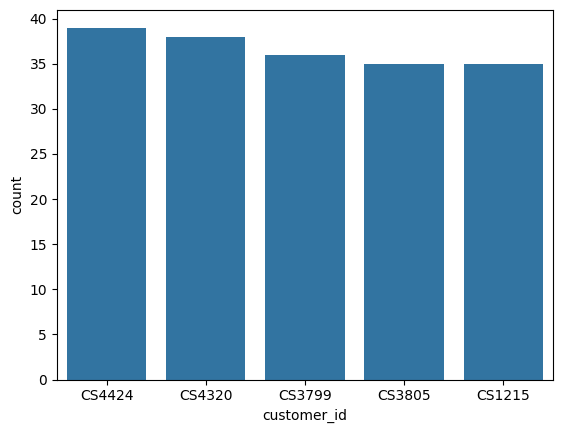

In [26]:
sns.barplot(x='customer_id',y='count',data=top_5_cus)

In [27]:
#customers having highest values of orders
customer_sales=df.groupby('customer_id')['tran_amount'].sum().reset_index()
customer_sales
#sort
top_5_sal=customer_sales.sort_values(by='tran_amount',ascending=False).head(5)
top_5_sal

,customer_id,tran_amount
3312,CS4424,2933
3208,CS4320,2647
4640,CS5752,2612
3548,CS4660,2527
2687,CS3799,2513


<Axes: xlabel='customer_id', ylabel='tran_amount'>

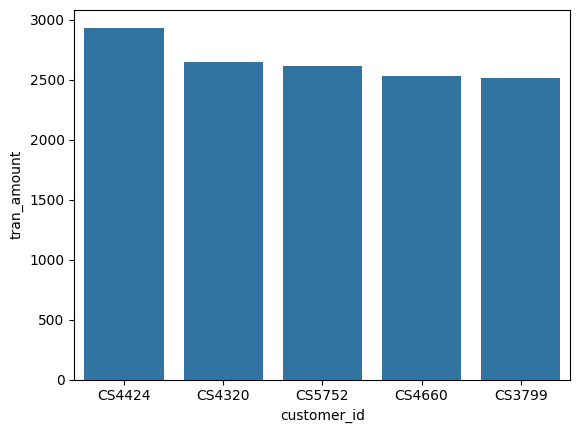

In [28]:
sns.barplot(x='customer_id',y='tran_amount',data=top_5_sal)

time series analysis

C:\Users\saahi\AppData\Local\Temp\ipykernel_24948\1580565507.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month_year']=df['trans_date'].dt.to_period('M')


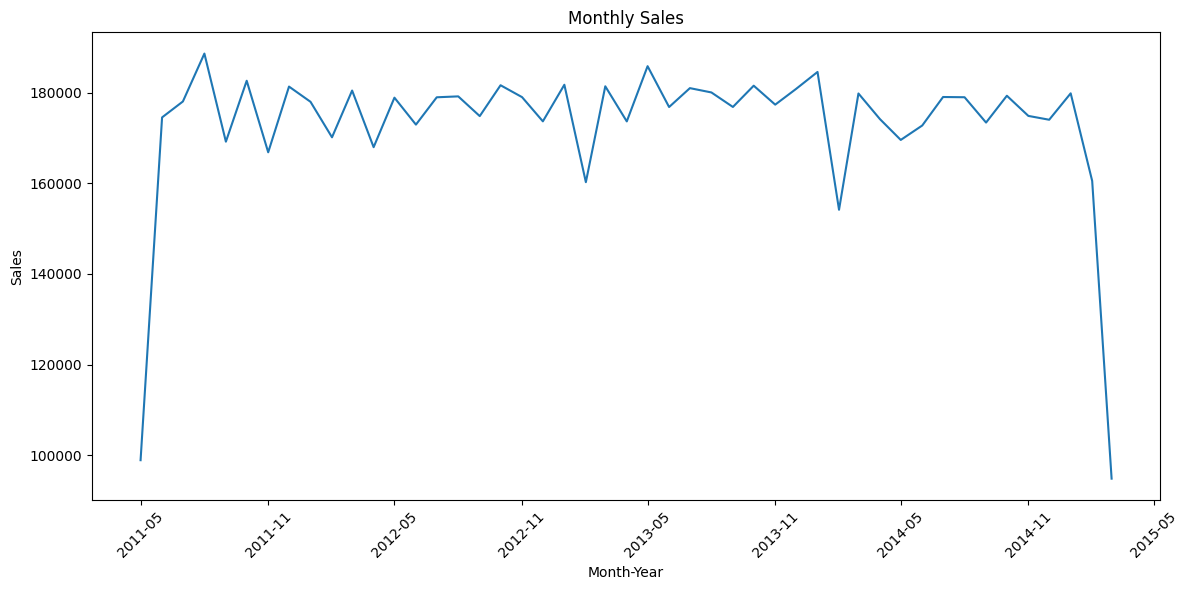

In [29]:
#time series analysis
import matplotlib.dates as mdates

df['month_year']=df['trans_date'].dt.to_period('M')
monthly_sales=df.groupby('month_year')['tran_amount'].sum()

monthly_sales.index=monthly_sales.index.to_timestamp()
plt.figure(figsize=(12,6))
plt.plot(monthly_sales.index,monthly_sales.values)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.xlabel('Month-Year')
plt.ylabel('Sales')
plt.title('Monthly Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

cohort segmentation

In [30]:
#cohort segmentation

#recency
recency=df.groupby('customer_id')['trans_date'].max()
#frequency
frequency=df.groupby('customer_id')['trans_date'].count()
#monetory
monetory=df.groupby('customer_id')['tran_amount'].sum()
#combine
rfm=pd.DataFrame({'recency':recency,'frequency':frequency,'monetory':monetory})

rfm

,recency,frequency,monetory
customer_id,,,
CS1112,2015-01-14,15,1012
CS1113,2015-02-09,20,1490
CS1114,2015-02-12,19,1432
CS1115,2015-03-05,22,1659
CS1116,2014-08-25,13,857
...,...,...,...
CS8996,2014-12-09,13,582
CS8997,2014-06-28,14,543
CS8998,2014-12-22,13,624


In [31]:
#customer segmentation
def segment_customer(row):
    if row['recency'].year>=2012 and row['frequency']>=15 and row['monetory']>=1000:
        return 'P0'
    elif (2011<=row['recency'].year<2012) and (10<row['frequency']<15) and (500<=row['monetory']<=1000):
        return 'P1'
    else:
        return 'P2'
rfm['segment']=rfm.apply(segment_customer, axis=1)
rfm

,recency,frequency,monetory,segment
customer_id,,,,
CS1112,2015-01-14,15,1012,P0
CS1113,2015-02-09,20,1490,P0
CS1114,2015-02-12,19,1432,P0
CS1115,2015-03-05,22,1659,P0
CS1116,2014-08-25,13,857,P2
...,...,...,...,...
CS8996,2014-12-09,13,582,P2
CS8997,2014-06-28,14,543,P2
CS8998,2014-12-22,13,624,P2


churn analysis

<Axes: xlabel='response'>

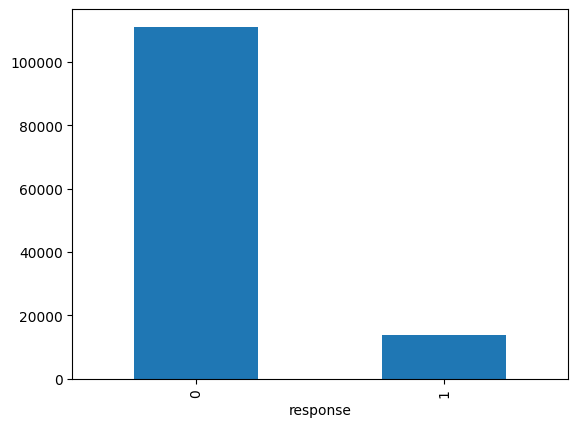

In [32]:
#count the numbers of churned and active customers
churn_counts=df['response'].value_counts()
churn_counts.plot(kind='bar')

Analyzing top customers

<Axes: xlabel='month_year'>

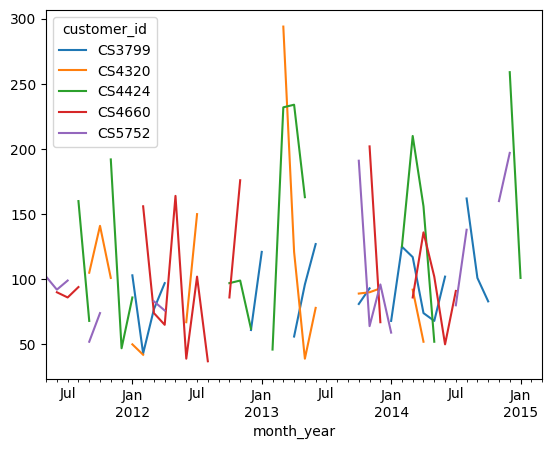

In [33]:
top_5_cus=monetory.sort_values(ascending=False).head(5).index

top_customer_df=df[df['customer_id'].isin(top_5_cus)]

top_customer_sales=top_customer_df.groupby(['customer_id','month_year'])['tran_amount'].sum().unstack(level=0)
top_customer_sales.plot(kind='line')

In [34]:
df.to_csv('maindata.csv')

In [35]:
rfm.to_csv('addanlys.csv')

In [36]:
mrg=df.merge(rfm, on='customer_id', how='left')
mrg

,customer_id,trans_date,tran_amount,response,month,year,month_year,recency,frequency,monetory,segment
0,CS5295,2013-02-11,35,1,2,2013,2013-02,2014-11-25,25,1637,P0
1,CS4768,2015-03-15,39,1,3,2015,2015-03,2015-03-15,26,1721,P0
2,CS2122,2013-02-26,52,0,2,2013,2013-02,2015-02-23,23,1648,P0
3,CS1217,2011-11-16,99,0,11,2011,2011-11,2014-12-29,20,1431,P0
4,CS1850,2013-11-20,78,0,11,2013,2013-11,2015-03-09,24,1908,P0
...,...,...,...,...,...,...,...,...,...,...,...
124964,CS8433,2011-06-26,64,0,6,2011,2011-06,2014-12-30,20,960,P2
124965,CS7232,2014-08-19,38,0,8,2014,2014-08,2014-09-01,12,498,P2
124966,CS8731,2014-11-28,42,0,11,2014,2014-11,2015-02-28,15,654,P2
124967,CS8133,2013-12-14,13,0,12,2013,2013-12,2014-12-20,12,509,P2


In [37]:
mrg.to_csv('merged.csv')

In [38]:
mrg.to_excel('merged.xlsx')